Határozzuk meg az alábbi ábrán látható tartó súlypontvonalának eltolódását leíró $v\left(x\right)$ függvényt végeselemes módszer használatával, síkbeli egyenes gerendalemek alkalmazásával.
Vizsgáljuk meg a végeselemes megoldással kapott hajlítónyomatéki igénybevétel hibáját az egyes szakaszokon.
Határozzuk meg az $x = a/2$ keresztmetszetben a hajlítónyomatéki igénybevétel nagyságát 2, illetve 3 síkbeli egyenes gerendaelem alkalmazásával.
A tartók két különböző átmérőjű ($d_1 = 2d$, illetve $d_2 = d$) kör keresztmetszetű tartókból
vannak összeépítve.
A tartók anyaga lineárisan rugalmas, homogén, izotrop. A $d_1$ átmérőjű rész rugalmassági modulusza $E$, míg a $d_2$ átmérővel rendelkező részé $4E$.

In [102]:
import sympy as sp
from sympy import Poly
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

sp.init_printing()

In [103]:
p, xi, L, I, E = sp.symbols("p, xi L I E")
a = sp.IndexedBase('a')
i = sp.Idx('i', (0, 5))
v1, v2, v3 = sp.symbols("v_1 v_2 v_3")
fi1, fi2, fi3 = sp.symbols("phi_1 phi_2 phi_3")

In [104]:
ue = [v1,fi1,v2,fi2,v3,fi3]
ve = sp.Sum(a[i]*xi**i,(i,0,5)).doit()
ve

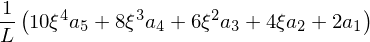

In [105]:
fie = sp.diff(ve,xi)*2/L
fie

Csomóponti feltételrendszer megoldás

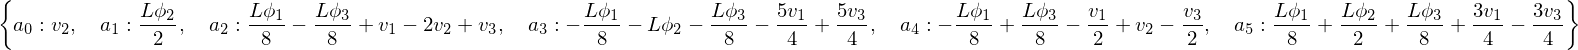

In [106]:
cspfmego = sp.solve([ve.subs([(xi,-1)])-v1,ve.subs([(xi,0)])-v2,ve.subs([(xi,1)])-v3,
                 fie.subs([(xi,-1)])-fi1,fie.subs([(xi,0)])-fi2,fie.subs([(xi,1)])-fi3],[a[0],a[1],a[2],a[3],a[4],a[5]])
cspfmego

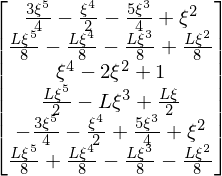

In [107]:
Nv = sp.Matrix([(ve.subs(cspfmego).expand()).coeff(ue[i]) for i in range(6)])
Nv

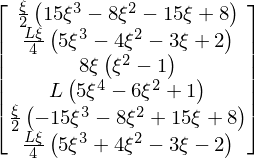

In [108]:
Nfi=sp.diff(Nv,xi)*(2/L)
sp.simplify((1/L)**(-1)*Nfi)

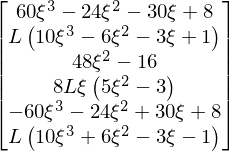

In [109]:
Bv=sp.diff(Nv,xi,2)*(2/L)**2
sp.simplify((1/L**2)**(-1)*Bv)

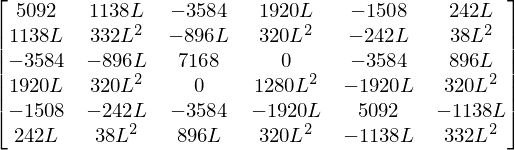

In [110]:
KeBEAM1D = I*E*sp.integrate(Bv*(Bv.T),(xi,-1,1))*L/2
(I*E/(35*L**3))**(-1)*KeBEAM1D

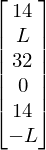

In [111]:
Fp = p*sp.integrate(Nv,(xi,-1,1))*L/2
(p*L/60)**(-1)*Fp

In [112]:
def Bvfgv(xi,L):
    return np.multiply(1/L**2,np.array([
        60*xi**3 - 24*xi**2 - 30*xi + 8,
        L*(10*xi**3 - 6*xi**2 - 3*xi + 1),
        48*xi**2 - 16,
        8*L*xi*(5*xi**2 - 3),
        -60*xi**3 - 24*xi**2 + 30*xi + 8,
        L*(10*xi**3 + 6*xi**2 - 3*xi - 1)]))

In [113]:
def Nvfgv(xi,L):
    return np.array([
        3*xi**5/4 - xi**4/2 - 5*xi**3/4 + xi**2,
        L*xi**5/8 - L*xi**4/8 - L*xi**3/8 + L*xi**2/8,
        xi**4 - 2*xi**2 + 1,
        L*xi**5/2 - L*xi**3 + L*xi/2,
        -3*xi**5/4 - xi**4/2 + 5*xi**3/4 + xi**2,
        L*xi**5/8 + L*xi**4/8 - L*xi**3/8 - L*xi**2/8])

In [114]:
def dddNvfgv(xi,L):
    return np.multiply(1/L**3,np.array([
        6*L*(30*xi**2 - 8*xi - 5),
        L**2*(30*xi**2 - 12*xi - 3),
        96*L*xi,
        L**2*(120*xi**2 - 24),
        6*L*(-30*xi**2 - 8*xi + 5),
        L**2*(30*xi**2 + 12*xi - 3)]))

In [115]:
def Nfifgv(xi,L):
    return np.multiply(1/L,np.array([
        xi*(15*xi**3 - 8*xi**2 - 15*xi + 8)/2,
        L*xi*(5*xi**3 - 4*xi**2 - 3*xi + 2)/4,
        8*xi*(xi**2 - 1),
        L*(5*xi**4 - 6*xi**2 + 1),
        xi*(-15*xi**3 - 8*xi**2 + 15*xi + 8)/2,
        L*xi*(5*xi**3 + 4*xi**2 - 3*xi - 2)/4]))

In [116]:
def KeBEAM1D(I,E,L):
    return np.multiply(I*E/(35*L**3), np.array([
        [5092, 1138*L, -3584, 1920*L, -1508, 242*L],
        [1138*L, 332*L**2, -896*L, 320*L**2, -242*L, 38*L**2],
        [-3584, -896*L, 7168, 0, -3584, 896*L],
        [1920*L, 320*L**2, 0, 1280*L**2, -1920*L, 320*L**2],
        [-1508, -242*L, -3584, -1920*L, 5092, -1138*L],
        [242*L, 38*L**2, 896*L, 320*L**2, -1138*L, 332*L**2]]))

In [117]:
def Fp(p,L):
    return np.multiply(L*p/60,np.array([
        14,
        L,
        32,
        0,
        14,
        -L]))

In [118]:
a=800e-3
b=400e-3
d=20e-3
E=50e9
nu=0.3
F1=2500
M1=-500
p0=-5000

In [119]:
I1 = (2*d)**4*np.pi/64
I2 = (d)**4*np.pi/64
E1 = E
E2 = 4*E
Ke1 = KeBEAM1D(I1,E1,a)
Ke2 = KeBEAM1D(I2,E2,b)

In [120]:
elemSZF = np.array([[1,2,3,4,5,6],[5,6,7,8,9,10]]) - 1

In [121]:
KG=np.zeros((10,10))

In [122]:
eind=0
KG[np.ix_(elemSZF[eind],elemSZF[eind])]+=Ke1

In [123]:
eind=1
KG[np.ix_(elemSZF[eind],elemSZF[eind])]+=Ke2

In [124]:
FG=np.zeros(10)
FG[elemSZF[0]] += Fp(p0,a)
FG[elemSZF[0,-2]] += F1
FG[elemSZF[1,-1]] += M1
FG

array([ -933.33333333,   -53.33333333, -2133.33333333,     0.        ,
        1566.66666667,    53.33333333,     0.        ,     0.        ,
           0.        ,  -500.        ])

In [125]:
fixSZF=np.array([1,2,9])-1

In [142]:
szabadSZF=[i for i in range(0,10) if i not in fixSZF]
szabadSZF

In [143]:
KGkond = KG[np.ix_(szabadSZF,szabadSZF)]

In [144]:
FGkond = FG[np.ix_(szabadSZF)]

In [145]:
Umego = np.linalg.solve(KGkond,FGkond)
Umego

array([ 0.00381972,  0.02015963,  0.01358122,  0.02122066,  0.01252019,
       -0.03289202, -0.0933709 ])

In [146]:
UG = np.zeros(10)
UG[np.ix_(szabadSZF)] += Umego
UG

array([ 0.        ,  0.        ,  0.00381972,  0.02015963,  0.01358122,
        0.02122066,  0.01252019, -0.03289202,  0.        , -0.0933709 ])

In [147]:
FR = np.dot(KG,UG)-FG
FR

array([  1.25000000e+03,  -2.00000000e+02,   1.36424205e-12,
         6.36646291e-12,  -2.27373675e-12,   9.00968189e-12,
         0.00000000e+00,   0.00000000e+00,   2.50000000e+02,
         4.54747351e-13])

# Eredmények ábrázolása

In [148]:
xiLista = np.linspace(-1,1,num = 20)
cspxKRD=[[0,a],[a,a+b]]
cspxKRD

In [149]:
x1Lista=[(cspxKRD[0][1]-cspxKRD[0][0])/2*(xi+1) + cspxKRD[0][0] for xi in xiLista]
x2Lista=[(cspxKRD[1][1]-cspxKRD[1][0])/2*(xi+1) + cspxKRD[1][0] for xi in xiLista]
xLista = np.concatenate((x1Lista,x2Lista))

In [150]:
v1Lista = [np.dot(Nvfgv(xi,a),UG[elemSZF[0]]) for xi in xiLista]
v2Lista = [np.dot(Nvfgv(xi,b),UG[elemSZF[1]]) for xi in xiLista]
vLista = np.concatenate((v1Lista,v2Lista))

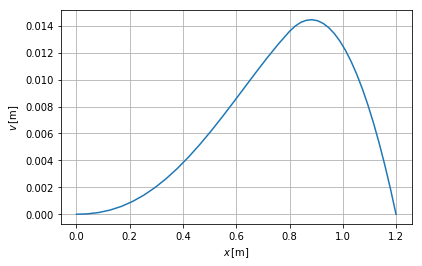

In [151]:
figv = plt.figure(num = 1, figsize=(16/2.54,10/2.54))
axv = figv.add_subplot(111)

axv.plot(xLista,vLista)

plt.xlabel(r"$x \, \left[\mathrm{m}\right]$")
plt.ylabel(r"$v \, \left[\mathrm{m}\right]$")

plt.grid()
plt.legend()
plt.show()

In [152]:
fi1Lista = [np.dot(Nfifgv(xi,a),UG[elemSZF[0]]) for xi in xiLista]
fi2Lista = [np.dot(Nfifgv(xi,b),UG[elemSZF[1]]) for xi in xiLista]
fiLista = np.concatenate((fi1Lista,fi2Lista))

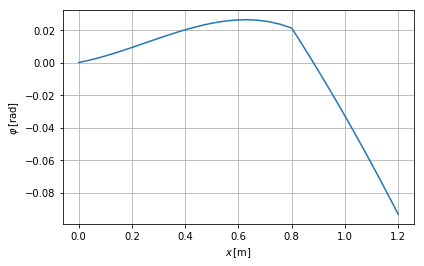

In [153]:
figfi = plt.figure(num = 2, figsize=(16/2.54,10/2.54))
axfi = figfi.add_subplot(111)

axfi.plot(xLista,fiLista)

plt.xlabel(r"$x \, \left[\mathrm{m}\right]$")
plt.ylabel(r"$\varphi \, \left[\mathrm{rad}\right]$")

plt.grid()
plt.legend()
plt.show()

In [154]:
Mh1Lista = [-I1*E1*np.dot(Bvfgv(xi,a),UG[elemSZF[0]]) for xi in xiLista]
Mh2Lista = [-I2*E2*np.dot(Bvfgv(xi,b),UG[elemSZF[1]]) for xi in xiLista]
MhLista = np.concatenate((Mh1Lista,Mh2Lista))

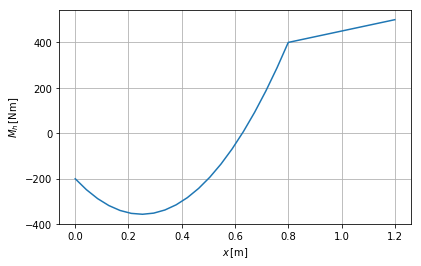

In [155]:
figMh = plt.figure(num = 3, figsize=(16/2.54,10/2.54))
axMh = figMh.add_subplot(111)

axMh.plot(xLista,MhLista)

plt.xlabel(r"$x \, \left[\mathrm{m}\right]$")
plt.ylabel(r"$M_h \, \left[\mathrm{Nm}\right]$")

plt.grid()
plt.legend()
plt.show()

In [156]:
V1Lista = [I1*E1*np.dot(dddNvfgv(xi,a),UG[elemSZF[0]]) for xi in xiLista]
V2Lista = [I2*E2*np.dot(dddNvfgv(xi,b),UG[elemSZF[1]]) for xi in xiLista]
VLista = np.concatenate((V1Lista,V2Lista))

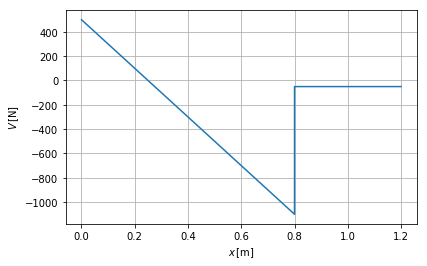

In [157]:
figV = plt.figure(num = 4, figsize=(16/2.54,10/2.54))
axV = figV.add_subplot(111)

axV.plot(xLista,VLista)

plt.xlabel(r"$x \, \left[\mathrm{m}\right]$")
plt.ylabel(r"$V \, \left[\mathrm{N}\right]$")

plt.grid()
plt.legend()
plt.show()